In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
reader = pd.read_csv('flows.txt', names=['time', 'duration','src', 'src_port', 'dest', 
                                         'dest_port', 'protocol', 'packet_count', 'byte_count'], chunksize=3502170)
for chunk in reader:
    df2 = chunk
    break

In [3]:
df2.describe()

time      duration      protocol  packet_count    byte_count
count  3.502170e+06  3.502170e+06  3.502170e+06  3.502170e+06  3.502170e+06
mean   2.871847e+04  8.523856e+00  6.865016e+00  2.213150e+02  1.814965e+05
std    9.990595e+03  1.759225e+01  3.364724e+00  4.812159e+03  6.191248e+06
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  4.600000e+01
25%    2.488500e+04  0.000000e+00  6.000000e+00  1.000000e+00  6.000000e+01
50%    3.064500e+04  0.000000e+00  6.000000e+00  4.000000e+00  3.720000e+02
75%    3.629100e+04  9.000000e+00  6.000000e+00  8.000000e+00  2.088000e+03
max    4.218600e+04  7.300000e+01  1.700000e+01  1.534824e+06  2.295971e+09

In [8]:
G2 = nx.from_pandas_dataframe(df2, 'src', 'dest', create_using=nx.DiGraph())

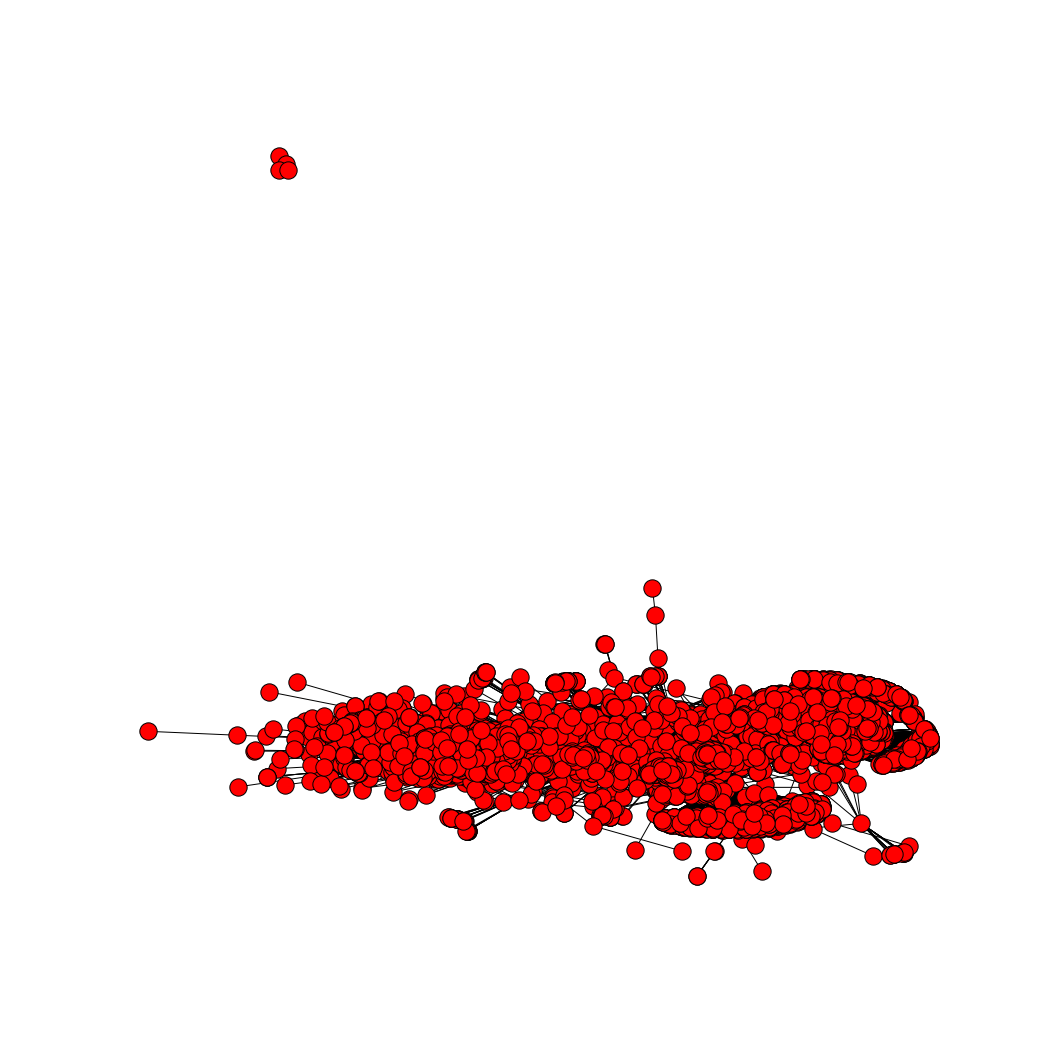

In [5]:
plt.figure(figsize=(14,14))

nx.draw(G2)

In [9]:
N, K = G2.order(), G2.size()
avg_deg = float(K) / N

print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("SCC: ", nx.number_strongly_connected_components(G2))
print("WCC: ", nx.number_weakly_connected_components(G2))

Nodes:  7752
Edges:  64240
Average degree:  8.28689370485036
SCC:  2879
WCC:  2


(1.0, 200)

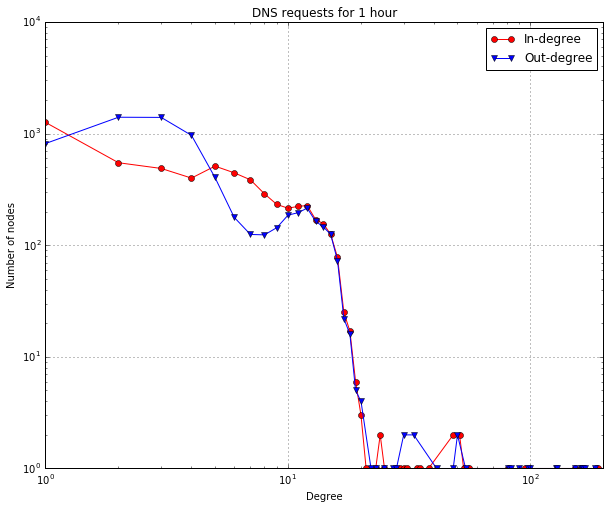

In [10]:
#from collections import Counter
in_degrees = G2.in_degree() # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]

out_degrees = G2.out_degree() # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]

plt.figure(figsize=(10,8))
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('DNS requests for 1 hour')
plt.xlim([0, 2*10**2])

In [54]:
nx.diameter(G2)

NetworkXError: Graph not connected: infinite path length

In [55]:
A = nx.adjacency_matrix(G2)

In [58]:
eig_vals = sorted(np.linalg.eigvals(A.todense()), reverse=True)[:100]

In [59]:
eig_vals

[(105.93592877917527+0j),
 (78.968846755804563+0j),
 (43.348546416504171+0j),
 (30.748325357503269+0j),
 (28.00304369137945+0j),
 (22.527517802712318+0j),
 (21.387218786393426+0j),
 (18.807900519600402+0j),
 (18.039756376034468+0j),
 (17.158416400073634+0j),
 (16.424997024590031+0j),
 (16.214175885817312+0j),
 (15.962166750155449+0j),
 (15.41113981589135+0j),
 (15.307952522859436+0j),
 (14.997544811473507+0j),
 (14.728044910436566+0j),
 (14.268530774847173+0j),
 (13.527192464152971+0j),
 (13.100214271931202+0j),
 (12.654500887084257+0j),
 (11.914629828934528+0j),
 (11.561491586454409+0j),
 (11.056446029094561+0j),
 (9.9706990928539554+0j),
 (9.6136599807283414+0j),
 (8.6164378846666736+0j),
 (7.9434721768590775+0j),
 (7.598496648686595+0j),
 (7.2356417048588213+0j),
 (7.0532713135308747+0.18149818538779183j),
 (7.0532713135308747-0.18149818538779183j),
 (7.0298317670402684+0j),
 (6.9454513693544051+0j),
 (6.3952332555817355+0j),
 (5.8190908551184455+0j),
 (5.5090548576442222+0j),
 (5.4

/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


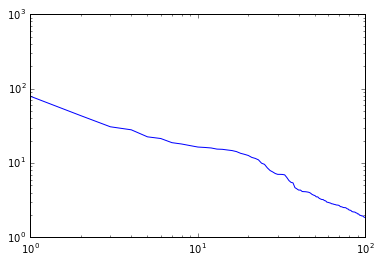

In [62]:
plt.loglog(eig_vals)

In [63]:
eig_vals2 = sorted(np.linalg.eigvals(A.todense()), reverse=False)[:100]

In [64]:
eig_vals2

[(-105.775139160181+0j),
 (-79.259632459810319+0j),
 (-43.245813596555607+0j),
 (-30.739523070844061+0j),
 (-27.993204358574669+0j),
 (-22.613709769508702+0j),
 (-21.36691930076303+0j),
 (-18.800561976119738+0j),
 (-18.037669148178384+0j),
 (-17.154744251822251+0j),
 (-16.425860406277398+0j),
 (-16.213216315610872+0j),
 (-15.970128326135592+0j),
 (-15.405377356268501+0j),
 (-15.283513640239976+0j),
 (-15.015021977531148+0j),
 (-14.720949195532272+0j),
 (-14.345623064458033+0j),
 (-13.433454433304604+0j),
 (-13.103061317123741+0j),
 (-12.647013390652177+0j),
 (-11.917054317083243+0j),
 (-11.597467353722484+0j),
 (-11.047285845482913+0j),
 (-9.9657906808739494+0j),
 (-9.6262871984543796+0j),
 (-8.6178931231022844+0j),
 (-7.9511210869239948+0j),
 (-7.5842930527185217+0j),
 (-7.2353035782708348+0j),
 (-7.1050403997990452+0j),
 (-6.9958215754194715+0j),
 (-6.9590758700866875-0.1326331674780942j),
 (-6.9590758700866875+0.1326331674780942j),
 (-6.3762961406608731+0j),
 (-5.8659689507926407+0j

In [ ]:
plt.loglog(eig_vals2)